In [36]:
# This sets plot images to a nice size
options(repr.plot.width = 6, repr.plot.height = 6)

# Loading packages
library(dplyr)
library(tidyr)
library(ggplot2)

# Loading data
life_expectancy <- read.csv("UNdata.csv")

# Taking a look at the first few rows
head(life_expectancy)

Country.or.Area,Subgroup,Year,Source,Unit,Value,Value.Footnotes
Afghanistan,Female,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1990-1995,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1985-1990,UNPD_World Population Prospects_2006 (International estimate),Years,41,NA
Afghanistan,Male,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Male,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA


In [56]:
# Subsetting and reshaping the life expectancy data
subdata <- life_expectancy  %>%
    filter(Year=="2000-2005") %>%
    select(Country.or.Area, Subgroup, Value) %>%
    spread(Subgroup, Value)

# Taking a look at the first few rows
head(subdata)

Country.or.Area,Female,Male
Afghanistan,42,42
Albania,79,73
Algeria,72,70
Angola,43,39
Argentina,78,71
Armenia,75,68


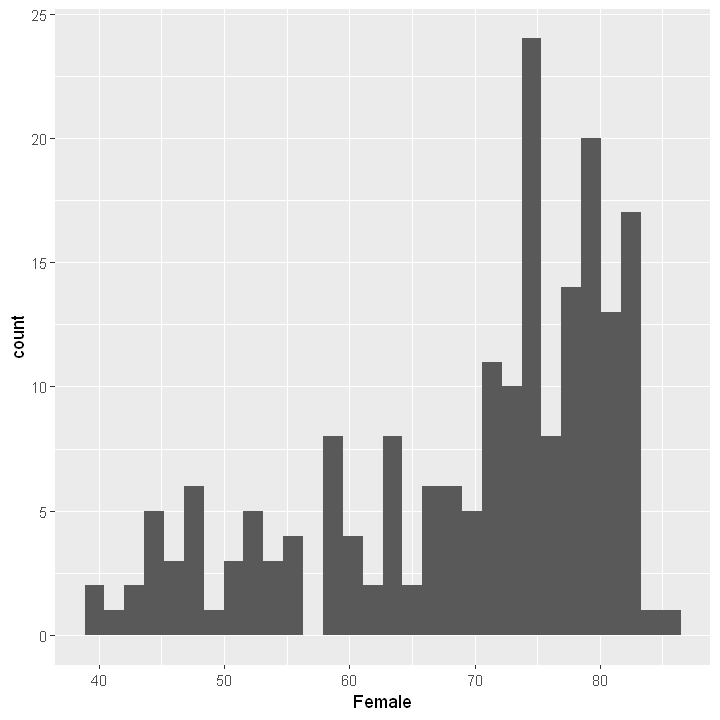

In [50]:
#Exploring the data
ggplot(subdata, aes(x=Female))+geom_histogram(bins=30)

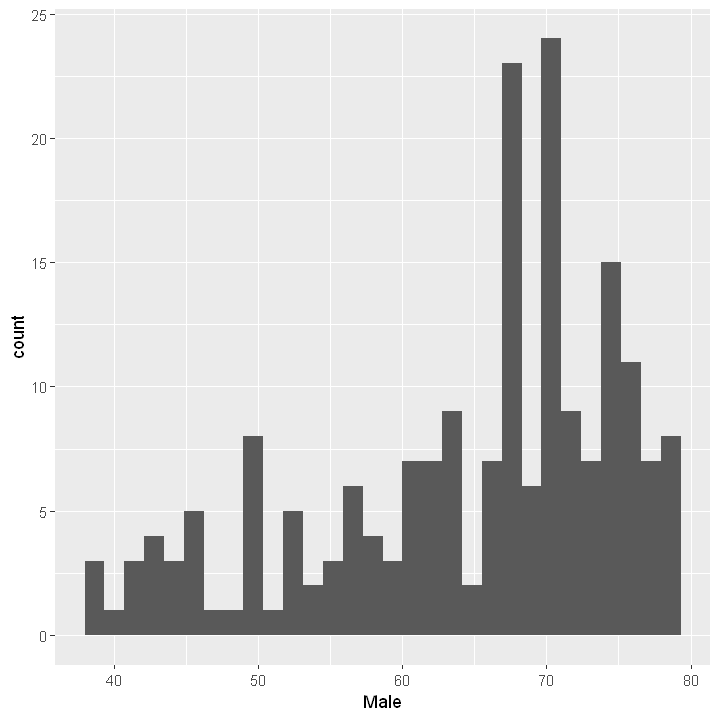

In [51]:
ggplot(subdata, aes(x=Male))+geom_histogram(bins=30)

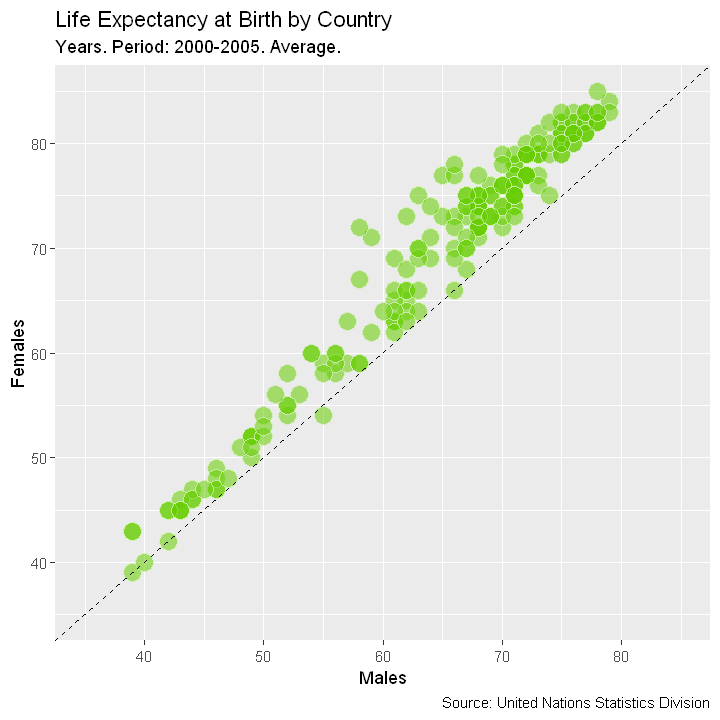

In [39]:
#More insight visualization
ggplot(subdata, aes(x=Male, y=Female))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")

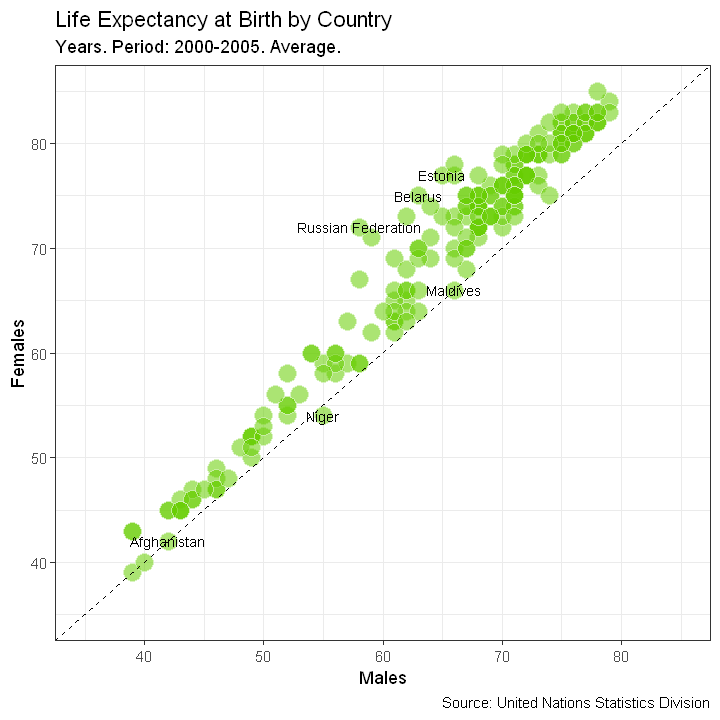

In [57]:
# Subseting data to obtain countries of interest
top_male <- subdata %>% arrange(Male-Female) %>% head(3)
top_female <- subdata %>% arrange(Female-Male) %>% head(3)

# Adding text to the previous plot to label countries of interest 
ggplot(subdata, aes(x=Male, y=Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data=top_male, size=3)+
  geom_text(data=top_female, size=3)+
theme_bw()

In [58]:
# Subsetting, mutating and reshaping the life expectancy data
subdata2 <- life_expectancy %>% 
  filter(Year %in% c("1985-1990", "2000-2005")) %>% 
  mutate(Sub_Year=paste(Subgroup, Year, sep="_")) %>% 
  mutate(Sub_Year=gsub("-", "_", Sub_Year)) %>% 
  select(-Subgroup, -Year) %>% 
  spread(Sub_Year, Value) %>% 
  mutate(diff_Female = Female_2000_2005 - Female_1985_1990, 
         diff_Male   = Male_2000_2005 - Male_1985_1990)

# Taking a look at the first few rows
head(subdata2)

Country.or.Area,Source,Unit,Value.Footnotes,Female_1985_1990,Female_2000_2005,Male_1985_1990,Male_2000_2005,diff_Female,diff_Male
Afghanistan,UNPD_World Population Prospects_2006 (International estimate),Years,NA,41,42,41,42,1,1
Albania,UNPD_World Population Prospects_2006 (International estimate),Years,NA,75,79,69,73,4,4
Algeria,UNPD_World Population Prospects_2006 (International estimate),Years,NA,67,72,65,70,5,5
Angola,UNPD_World Population Prospects_2006 (International estimate),Years,NA,42,43,38,39,1,1
Argentina,UNPD_World Population Prospects_2006 (International estimate),Years,NA,75,78,68,71,3,3
Armenia,UNPD_World Population Prospects_2006 (International estimate),Years,NA,71,75,66,68,4,2


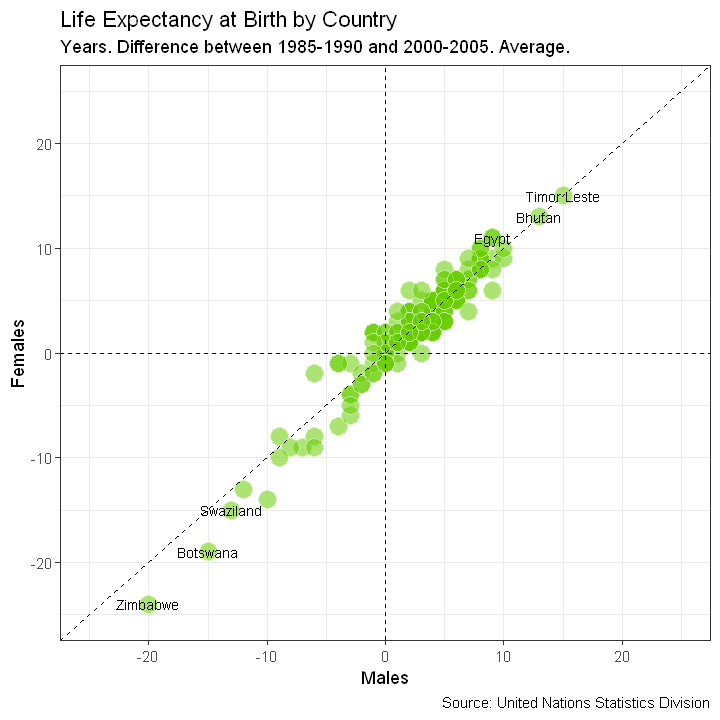

In [61]:
# Subseting data to obtain countries of interest
top <- subdata2 %>% arrange(diff_Male+diff_Female) %>% head(3)
bottom <- subdata2 %>% arrange(-(diff_Male+diff_Female)) %>% head(3)

# Adding text to the previous plot to label countries of interest
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area), guide=FALSE)+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept=0, linetype=2)+
  geom_vline(xintercept=0, linetype=2)+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data=top, size=3)+
  geom_text(data=bottom, size=3)+
  theme_bw()